In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import plotly.graph_objects as pgo
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

(1728, 7)
  Buying  Maint Doors Persons Lug_boot Safety  class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc


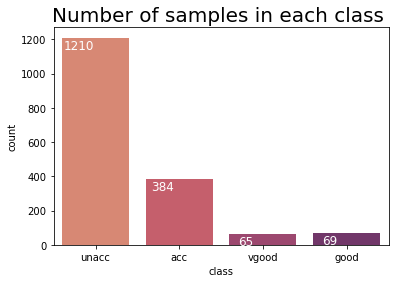

In [2]:
#Task One 
mycar = pd.read_csv('car_evaluation.csv', header=None)
df=mycar
# view dimensions of dataset
print(mycar.shape)
# preview the dataframe
mycar.head()
'''
Rename column names: give proper column name 
'''
col_names = ['Buying', 'Maint', 'Doors', 'Persons', 'Lug_boot', 'Safety','class']
mycar.columns = col_names
#  preview the dataframe
print(mycar.head())
#Check the number of missing values
mycar.isnull().sum()

#mycar['class'].value_counts()  
X = mycar.drop(['class'], axis=1) #input/feature vector
y = mycar['class']#target


# counting values of variables in 'diagnosis'
ax = sns.countplot(x="class", data=mycar, palette="flare")
ax.set_title('Number of samples in each class ', fontsize=20)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='center', color='white', size=12)
plt.show()

Persons    2    4  more
class                  
acc        0  198   186
good       0   36    33
unacc    576  312   322
vgood      0   30    35
Safety  high  low  med
class                 
acc      204    0  180
good      30    0   39
unacc    277  576  357
vgood     65    0    0


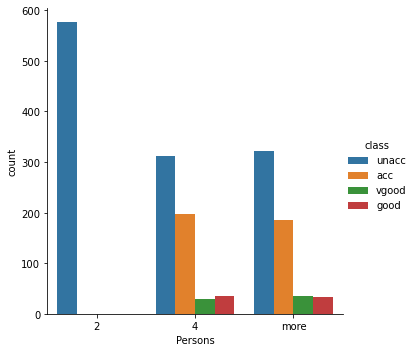

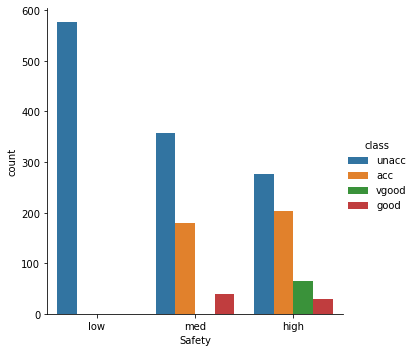

In [4]:
#Task Two 
print(pd.crosstab(mycar['class'], mycar.Persons))
sns.catplot(data=mycar, x='Persons', hue='class', kind="count")
# Crosstab and barplot of safety by class
print(pd.crosstab(mycar['class'], mycar.Safety))
sns.catplot(data=mycar, x='Safety', hue='class', kind="count")

Buying  high  low  med  vhigh
class                        
acc      108   89  115     72
good       0   46   23      0
unacc    324  258  268    360
vgood      0   39   26      0
----------------------------------
Maint  high  low  med  vhigh
class                       
acc     105   92  115     72
good      0   46   23      0
unacc   314  268  268    360
vgood    13   26   26      0
----------------------------------
Doors    2    3    4  5more
class                      
acc     81   99  102    102
good    15   18   18     18
unacc  326  300  292    292
vgood   10   15   20     20
----------------------------------
Lug_boot  big  med  small
class                    
acc       144  135    105
good       24   24     21
unacc     368  392    450
vgood      40   25      0


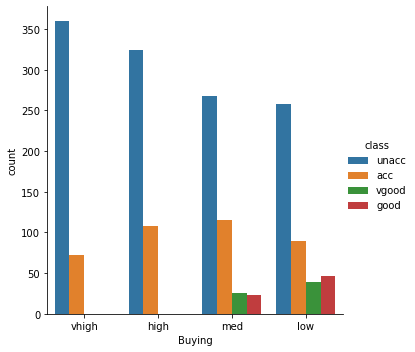

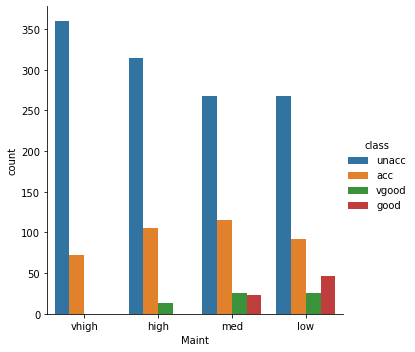

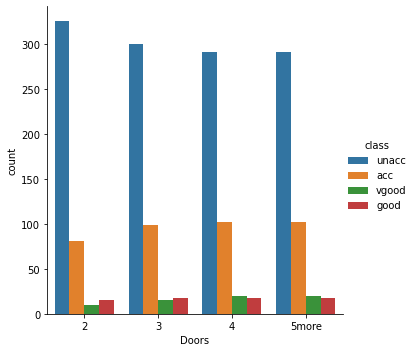

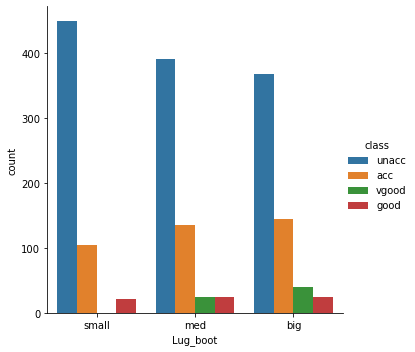

In [48]:
#Q1
print(pd.crosstab(mycar['class'], mycar.Buying))
sns.catplot(data=mycar, x='Buying', hue='class', kind="count")
print("----------------------------------")
print(pd.crosstab(mycar['class'], mycar.Maint))
sns.catplot(data=mycar, x='Maint', hue='class', kind="count")
print("----------------------------------")
print(pd.crosstab(mycar['class'], mycar.Doors))
sns.catplot(data=mycar, x='Doors', hue='class', kind="count")
print("----------------------------------")
print(pd.crosstab(mycar['class'], mycar.Lug_boot))
sns.catplot(data=mycar, x='Lug_boot', hue='class', kind="count")

In [61]:
#Task 3
# Subset dataset into input and output attributes
X = mycar[['Buying', 'Maint', 'Doors', 'Persons', 'Lug_boot', 'Safety']]
y = mycar[['class']]
nrows, ncols = mycar.shape

encoder = ce.OrdinalEncoder(cols=['Buying', 'Maint', 'Doors', 'Persons', 'Lug_boot', 'Safety'])
X_enc = encoder.fit_transform(X)

# Split data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X_enc, y, test_size=0.3, random_state=2)

Feature scores using Chi-square:  

Feature 0: 60.063675
Feature 1: 41.732166
Feature 2: 5.244350
Feature 3: 61.823048
Feature 4: 12.822208
Feature 5: 97.982738


<BarContainer object of 6 artists>

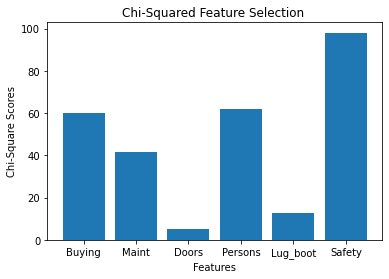

In [62]:
#Task 4
# Chi-squared feature selection
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)

# Scores for each feature
print('Feature scores using Chi-square: ','\n')
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# Plot scores
labels = ['Buying', 'Maint', 'Doors', 'Persons', 'Lug_boot', 'Safety']
fig, ax = plt.subplots()
ax.set_xlabel("Features")
ax.set_ylabel("Chi-Square Scores")
ax.set_title("Chi-Squared Feature Selection ")
plt.bar([i for i in range(len(fs.scores_))], fs.scores_,tick_label=labels)

Cancer data set dimensions : (569, 32)


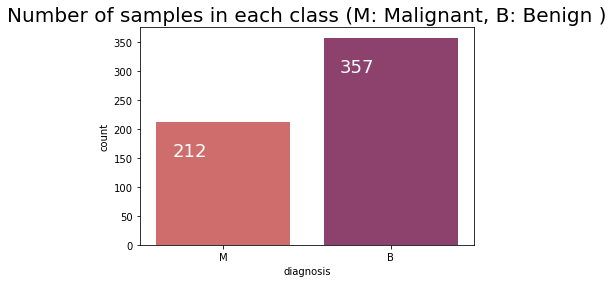

In [16]:
#Task 5 Data import and Exploartion
#Import dataset
BC_df = pd.read_csv('breast_cancer.csv')
BC_df.head()
print("Cancer data set dimensions : {}".format(BC_df.shape))

#Missing or Null Data points
BC_df.isnull().sum()
BC_df.isna().sum()

# show summary statistics
#print(BC_df.describe())

# counting values of variables in 'diagnosis'
ax = sns.countplot(x="diagnosis", data=BC_df, palette="flare")
ax.set_title('Number of samples in each class (M: Malignant, B: Benign )', fontsize=20)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)
plt.show()

In [17]:
#Task 6 Data Prepration
# Set the input (X) and output/target (y) 
X = BC_df.iloc[:, 1:31].values 
y = BC_df.iloc[:, 31].values

#Encoding categorical data values
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

Feature 0: 469.237570
Feature 1: 78.134357
Feature 2: 501.266806
Feature 3: 432.170763
Feature 4: 57.535704
Feature 5: 196.665319
Feature 6: 390.444837
Feature 7: 607.953095
Feature 8: 45.407943
Feature 9: 0.373854
Feature 10: 213.864297
Feature 11: 0.527017
Feature 12: 203.245039
Feature 13: 187.257462
Feature 14: 0.111326
Feature 15: 38.091411
Feature 16: 42.658035
Feature 17: 98.118416
Feature 18: 0.117171
Feature 19: 4.213892
Feature 20: 627.458042
Feature 21: 99.527090
Feature 22: 643.048231
Feature 23: 495.016795
Feature 24: 86.528293
Feature 25: 188.441040
Feature 26: 276.008441
Feature 27: 634.125089
Feature 28: 75.064925
Feature 29: 40.186765


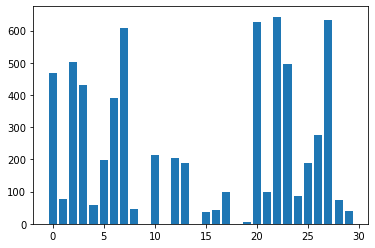

In [18]:
#Task 7 ANOVA FEATURE SELECTION
# Ranking of all features based on ANOVA F-scores

fs = SelectKBest(score_func=f_classif, k=30) 
fs.fit(X_train, y_train)
# transform train input data
X_train_fs = fs.transform(X_train)
# transform test input data
X_test_fs = fs.transform(X_test)

fs_score_df=pd.DataFrame()
feature_no=0
feature_score=0
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
    fs_score_df = fs_score_df.append({feature_no:i,feature_score:fs.scores_[i]}, ignore_index=True)
    
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [23]:
df = pd.read_excel('ANOVA.xlsx', index_col=0)
df.to_csv('ANOVA.csv', encoding='utf-8')
df = pd.read_csv('ANOVA.csv')

df.head(10)

,scores,feature
0,643.048231,22
1,634.125089,27
2,627.458042,20
3,607.953095,7
4,501.266806,2
5,495.016795,23
6,469.237570,0
7,432.170763,3
8,390.444837,6
9,276.008441,26
